In [1]:
from pybaseball import playerid_lookup, statcast_pitcher
import pandas as pd
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

Look up Lance Lynn and what info we can get for him

In [2]:
id = playerid_lookup('lynn','lance')
id

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,lynn,lance,458681,lynnl001,lynnla01,2520,2011.0,2019.0


In [26]:
full_df=statcast_pitcher(start_dt="2011-01-01", end_dt="2019-06-14", player_id=458681)

Gathering Player Data


/Users/tburch/Documents/gitDevelopment/baseball-studies/venv_py3_baseball/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
full_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2015-10-10,94.6,-1.8323,5.9984,Lance Lynn,543294,458681,strikeout,swinging_strike,NaN,NaN,NaN,NaN,6.0,Kyle Hendricks strikes out swinging.,D,R,R,STL,CHC,S,2.0,NaN,1,2,2015,-0.903767,1.207633,0.527,2.171,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173517,7.666,-137.411,-6.109,-10.739,27.747,-18.531,3.39,1.52,NaN,NaN,NaN,95.201,2550.0,6.251,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.2497,NaN,NaN,0.0,1.0,0.0,0.0,NaN,24,4,4-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Strategic
1,FF,2015-10-10,95.1,-1.8238,5.9670,Lance Lynn,543294,458681,NaN,ball,NaN,NaN,NaN,NaN,12.0,NaN,D,R,R,STL,CHC,B,NaN,NaN,0,2,2015,-1.333792,1.342367,0.654,4.268,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173458,9.108,-138.105,-1.109,-16.519,34.008,-16.882,3.64,1.66,NaN,NaN,NaN,94.243,2551.0,5.899,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.6023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,3,4-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Strategic
2,FT,2015-10-10,92.0,-1.7596,6.1144,Lance Lynn,543294,458681,NaN,foul,NaN,NaN,NaN,NaN,11.0,NaN,D,R,R,STL,CHC,S,NaN,NaN,0,1,2015,-1.207150,0.559767,-1.093,2.898,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173429,3.905,-133.969,-2.601,-14.169,26.922,-27.501,3.39,1.52,NaN,NaN,NaN,92.404,2249.0,6.070,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.4306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,2,2-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Standard
3,FF,2015-10-10,93.8,-1.8433,6.0165,Lance Lynn,543294,458681,NaN,foul,NaN,NaN,NaN,NaN,2.0,NaN,D,R,R,STL,CHC,S,NaN,NaN,0,0,2015,-1.169575,1.381067,0.068,2.815,NaN,516770.0,NaN,2,3,Top,NaN,NaN,NaN,NaN,425877.0,NaN,151010_173406,7.106,-136.308,-5.038,-14.085,29.188,-16.557,3.39,1.52,NaN,NaN,NaN,93.397,2430.0,5.819,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.6821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1,4-Seam Fastball,1,6,6,1,6,1,6,1,Standard,Standard
4,FT,2015-10-10,94.1,-2.0088,5.9006,Lance Lynn,471083,458681,field_out,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,"Miguel Montero grounds out, second baseman Kol...",D,L,R,STL,CHC,X,4.0,ground_ball,1,2,2015,-1.282300,0.341900,-0.420,1.815,519203.0,NaN,516770.0,1,3,Top,147.52,160.71,NaN,NaN,425877.0,NaN,151010_173314,6.570,-136.713,-4.883,-15.787,28.121,-30.221,3.34,1.44,NaN,82.9,-21.0,94.331,2297.0,6.115,446245,458681,425877.0,461235.0,543939.0,572761.0,425509.0,407812.0,518792.0,572039.0,54.3858,0.076,0.074,0.0,1.0,0.0,0.0,2.0,23,6,2-Seam Fastball,1,5,5,1,5,1,5,1,Standard,Strategic


Okay, I'd like to look at pitch type by year, so break this dataframe down year-wise

In [25]:
full_df['year'] = full_df['game_date'].str[:4].astype(int)
piv_dict = {}
for year in range(2011,2020):
    this_year_df = full_df[full_df["year"] == year]
    piv_dict[year] = this_year_df["pitch_name"].value_counts(normalize=True)

new_df = pd.DataFrame(piv_dict).transpose()
new_df = new_df.drop(["Intentional Ball","Pitch Out","Fastball"], axis=1)
new_df.head()

,2-Seam Fastball,4-Seam Fastball,Changeup,Curveball,Cutter,Slider
2011,0.322404,0.383880,0.020492,0.244536,NaN,0.013661
2012,0.220707,0.478611,0.067266,0.177619,NaN,0.051147
2013,0.217284,0.514678,0.037586,0.106722,NaN,0.121536
2014,0.246927,0.554493,0.023764,0.081945,NaN,0.090139
2015,0.279584,0.562419,0.026008,0.046164,NaN,0.078674


Plot pitch breakdown, both as line chart to see progression and stack plot for parts of a whole

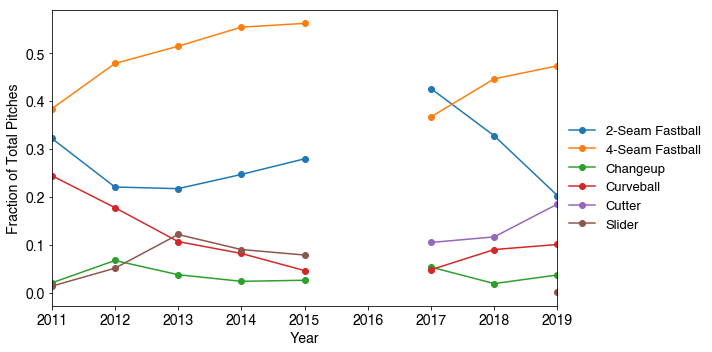

In [6]:
fig=plt.figure(figsize=(10,5))
new_df.plot(marker='o', ax=plt.gca())
plt.legend(frameon=False, bbox_to_anchor=(1, 0.65),fontsize=13)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Fraction of Total Pitches", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../plots/lynn/lynn_line')

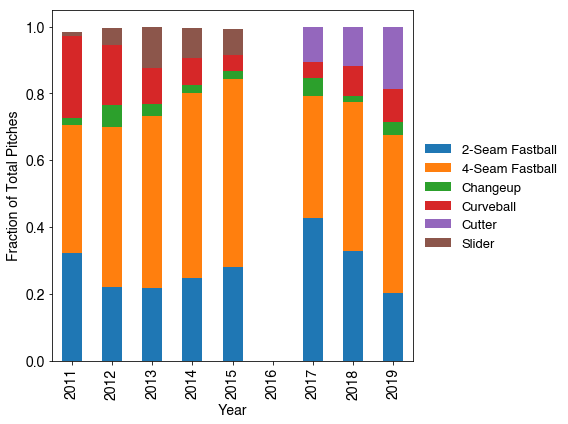

In [7]:
fig=plt.figure(figsize=(8,6))
new_df.plot(kind='bar',stacked=True, ax=plt.gca())
plt.legend(frameon=False, bbox_to_anchor=(1, 0.65),fontsize=13)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Fraction of Total Pitches", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig('../plots/lynn/lynn_stack')

Next, I'm interested to see his production rate - WAR/IP. WAR isn't readily available in statcast, so I'm going to have to webscrape it from fangraphs

In [8]:
from bs4 import BeautifulSoup
import requests

In [9]:
lynn_page = 'https://www.fangraphs.com/statss.aspx?playerid=2520&position=P'
page = requests.get(lynn_page)
soup = BeautifulSoup(page.text, 'html.parser')
found = soup.find('table',{'class':'rgMasterTable', 'id':'SeasonStats1_dgSeason11_ctl00'})
stats_df=pd.read_html(str(found))[0]

clean up this table

In [10]:
# get rid of minor league, projections
valid_teams = ['Cardinals','2 Teams','Rangers']
stats_df= stats_df[stats_df['Team'].isin(valid_teams)]
#get rid of playoff stats
season_rows = stats_df['Season'].loc[(stats_df['Season'].shift() != stats_df['Season'])]
stats_df = stats_df[stats_df.index.isin(season_rows.index)]
stats_df['Season']=stats_df['Season'].astype(int)
stats_df = stats_df.set_index('Season')

In [11]:
# Convert IP since .1 and .2 used for partial innings
extra_outs = stats_df['IP'].astype(str).str[-1]
total_outs = stats_df['IP'].apply(np.floor) * 3 + extra_outs.astype(int)
stats_df['corrected_IP'] = total_outs/3
stats_df['IP per WAR'] = (stats_df['corrected_IP']/stats_df['WAR'])

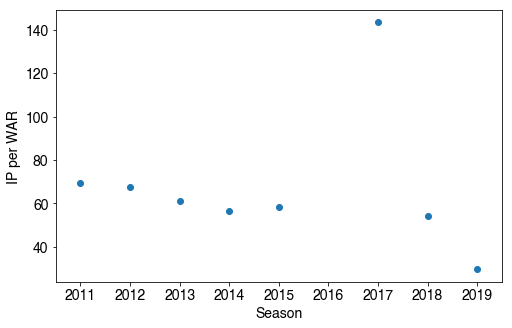

In [12]:
fig = plt.figure(figsize=(8,5))
(stats_df['corrected_IP']/stats_df['WAR']).plot(marker='o',linestyle='none')
plt.xlim(2010.5, 2019.5)
plt.xlabel("Season",fontsize=14)
plt.ylabel("IP per WAR", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.savefig('../plots/lynn/ip_per_war')

There's an interesting trend here, if you get rid of his outlier and rescale...

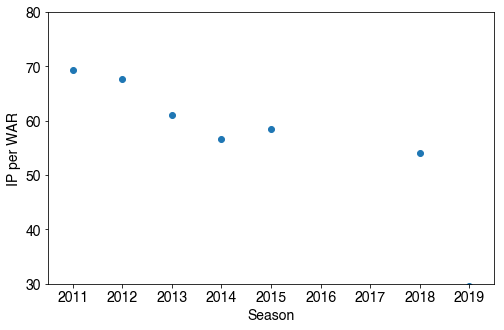

In [13]:
fig = plt.figure(figsize=(8,5))
(stats_df['corrected_IP']/stats_df['WAR']).plot(marker='o',linestyle='none')
plt.xlim(2010.5, 2019.5)
plt.ylim(30,80)
plt.xlabel("Season",fontsize=14)
plt.ylabel("IP per WAR", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('../plots/lynn/lynn_ip_per_war_small')

It'd be nice to get rid of the gap year and fit this...

In [14]:
pre2019 = stats_df[~stats_df.index.isin([2019,2017,2016])]

In [15]:
pre2019 = pre2019.reset_index()
pre2019 = pre2019.reset_index()

r^2 = 0.896171713851328


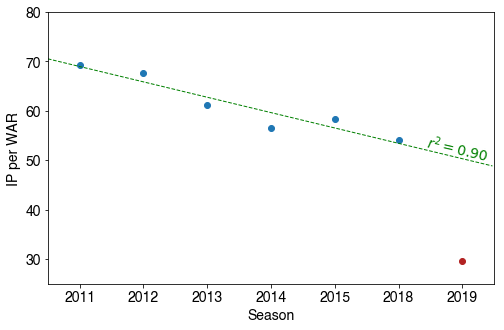

In [16]:
fig = plt.figure(figsize=(8,5))

import scipy.stats
slope, intercept, r_value, p_value, std_err = \
 scipy.stats.linregress(x=pre2019.index,y=pre2019['IP per WAR'])
rsquared = r_value**2
print("r^2 = {0}".format(rsquared))

pre2019['IP per WAR'].plot(marker='o', linestyle='none')

plt.xlim(0, 6.5)
valid_years = [str(x) for x in list(range(2011,2020)) if x not in [2017,2016]]
locs, labels = plt.xticks()
plt.xticks(ticks=locs,labels=valid_years)
plt.xlim(-0.5, 6.5)

plt.ylim(25,80)

xlims = plt.xlim()
new_x = np.arange(xlims[0], xlims[1],(xlims[1]-xlims[0])/250.)
plt.gca().plot(new_x, intercept + slope *  new_x, color='g', linestyle='--', lw = 1)
plt.annotate('$r^2 = {0:.2f}$'.format(rsquared),xy=(0.99,0.5),xycoords='axes fraction', ha='right',fontsize=14, color='g',rotation=-13)
plt.xlabel("Season",fontsize=14)
plt.ylabel("IP per WAR", fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

#fig = plt.figure(figsize=(8,5))
#sns.regplot(x='index',y='IP per WAR', data=pre2019)
plt.plot(6,stats_df['IP per WAR'][2019], marker='o',color='firebrick')
plt.savefig('../plots/lynn/lynn_ip_per_war_regression')

2019 does not match the trend, let's figure out what the expectation for that might be...

In [17]:
print("Regressed value: {0}".format(round(slope*6+ intercept,2)))
print("pre-2019 Career average: {0}".format(round(pre2019['IP per WAR'].mean(),2)))
print("Actual value: {0}".format(round(stats_df['IP per WAR'][2019],2)))

Regressed value: 50.31
pre-2019 Career average: 61.2
Actual value: 29.66


As one last check - he's changed his pitches, but do those pitches actually have better results overall than the 2-seamer he moved away from?

In [18]:
results = list(full_df["description"].value_counts().keys())
pitchtypes = list(full_df["pitch_name"].value_counts().keys())

piv_dict = {}
for p in pitchtypes:
    p_df = full_df[full_df["pitch_name"] == p]
    piv_dict[p] = p_df["description"].value_counts(normalize=True)
    
# Clean and add a total strike row
result_df_edit = pd.DataFrame(piv_dict).transpose().fillna(0)    
result_df_edit["all_strikes"] = result_df_edit["called_strike"] + result_df_edit["swinging_strike"] +  result_df_edit["swinging_strike_blocked"] 
result_df = result_df_edit.transpose()

In [19]:
result_df

,4-Seam Fastball,2-Seam Fastball,Curveball,Slider,Cutter,Changeup,Intentional Ball,Pitch Out,Fastball
ball,0.324393,0.373790,0.404862,0.411419,0.410560,0.540074,0.0,0.0,0.0
blocked_ball,0.001794,0.008201,0.062646,0.014274,0.020474,0.035758,0.0,0.0,0.0
called_strike,0.185192,0.136625,0.154745,0.110831,0.133621,0.097411,0.0,0.0,0.5
foul,0.220323,0.179761,0.105189,0.134341,0.158405,0.099877,0.0,0.0,0.5
foul_bunt,0.004344,0.007381,0.000935,0.001679,0.004310,0.003699,0.0,0.0,0.0
foul_tip,0.014921,0.007873,0.004208,0.010076,0.008621,0.006165,0.0,0.0,0.0
hit_by_pitch,0.001794,0.003936,0.003740,0.001679,0.001078,0.001233,0.0,0.0,0.0
hit_into_play,0.091132,0.134492,0.110332,0.121746,0.114224,0.103576,0.0,0.0,0.0
hit_into_play_no_out,0.032014,0.054945,0.035063,0.052057,0.035560,0.036991,0.0,0.0,0.0
hit_into_play_score,0.016904,0.021978,0.022908,0.026868,0.009698,0.011097,0.0,0.0,0.0


Calculate improvement in strikes and balls in play

In [20]:
print("More strikes:")
print("Cutter: ", result_df["Cutter"].loc["swinging_strike"] - result_df["2-Seam Fastball"].loc["swinging_strike"])
print("4-seam: ", result_df["4-Seam Fastball"].loc["swinging_strike"] - result_df["2-Seam Fastball"].loc["swinging_strike"])


More strikes:
Cutter:  0.03456193831901501
4-seam:  0.03801705276764583


In [21]:
print("Less in play:")
print("Cutter: ",  result_df["2-Seam Fastball"].loc["hit_into_play"]-result_df["Cutter"].loc["hit_into_play"])
print("4-seam: ",  result_df["2-Seam Fastball"].loc["hit_into_play"]-result_df["4-Seam Fastball"].loc["hit_into_play"])

Less in play:
Cutter:  0.02026823536730897
4-seam:  0.04336006618719038


Look at when he's throwing pitches

In [22]:
piv_dict = {}
for s in range(0,3):
    p_df = full_df[full_df["strikes"] == s]
    p_df = p_df[p_df['year'] != 2019]
    piv_dict[s] = p_df["pitch_name"].value_counts(normalize=True)


# Clean and add a total strike row
result_df_edit = pd.DataFrame(piv_dict).transpose().fillna(0)    
result_df_previous = result_df_edit[["2-Seam Fastball", "4-Seam Fastball", "Changeup", "Curveball", "Cutter"]].transpose()
result_df_previous.rename_axis("Strikes",axis=1)

Strikes,0,1,2
2-Seam Fastball,0.315725,0.311334,0.213631
4-Seam Fastball,0.482250,0.452415,0.526246
Changeup,0.035623,0.046549,0.029495
Curveball,0.079907,0.097083,0.123146
Cutter,0.032085,0.032361,0.035327


In [23]:
piv_dict = {}
for s in range(0,3):
    p_df = full_df[full_df["strikes"] == s]
    p_df = p_df[p_df['year'] == 2019]
    piv_dict[s] = p_df["pitch_name"].value_counts(normalize=True)

# Clean and add a total strike row
result_df_edit = pd.DataFrame(piv_dict).transpose().fillna(0)    
result_df_2019 = result_df_edit[["2-Seam Fastball", "4-Seam Fastball", "Changeup", "Curveball", "Cutter"]].transpose()
result_df_2019.rename_axis("Strikes",axis=1)


Strikes,0,1,2
2-Seam Fastball,0.214953,0.211165,0.178218
4-Seam Fastball,0.500935,0.434466,0.477723
Changeup,0.028037,0.050971,0.034653
Curveball,0.102804,0.053398,0.146040
Cutter,0.151402,0.250000,0.163366


In [27]:
sub_df=result_df_2019.subtract(result_df_previous).round(3)
sub_df=sub_df.rename_axis("Strikes",axis=1)
sub_df

Strikes,0,1,2
2-Seam Fastball,-0.101,-0.100,-0.035
4-Seam Fastball,0.019,-0.018,-0.049
Changeup,-0.008,0.004,0.005
Curveball,0.023,-0.044,0.023
Cutter,0.119,0.218,0.128


In [24]:
sub_df.to_csv('../plots/lynn/usagetable.csv')